# [Tarea 06] Unidad 03-A | Serie de Taylor y Polinomios de Lagrange

* Nombre:Luis Lema
* Curso:Gr1cc
* Materia: Metodos Númericos
* Fecha: 27/10/2024

## CONJUNTO DE EJERCICIOS. -

- Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:

- Funciones. -

![](imagen1.png)

### SERIES DE TAYLOR. -

#### 1ra. FUNCION. -

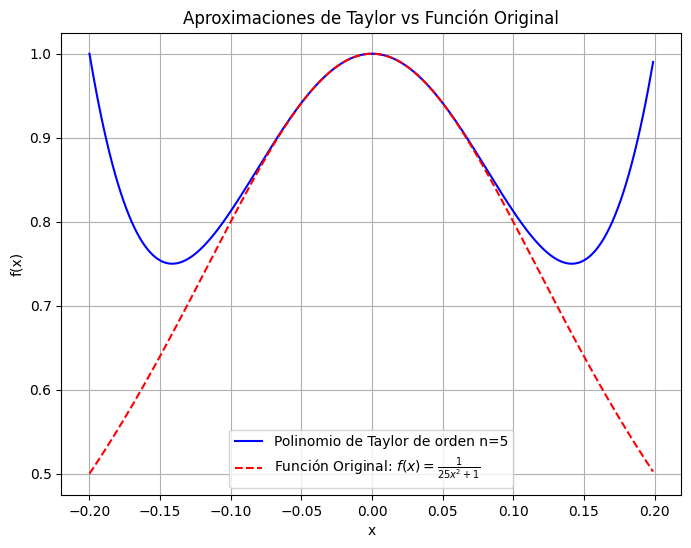

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función original
def funcion_original(x):
    return 1 / (25 * x**2 + 1)

# Definición del polinomio de Taylor de orden n=5
def polinomio_taylor(x):
    return 625*x**4 - 25*x**2 + 1

# Generar valores de x en el rango [-0.2, 0.2]
x = np.arange(-0.2, 0.2, 0.001)

# Calcular los valores para la función original y el polinomio de Taylor
y_original = funcion_original(x)
y_taylor = polinomio_taylor(x)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x, y_taylor, label='Polinomio de Taylor de orden n=5', color='blue')
plt.plot(x, y_original, label='Función Original: $f(x) = \\frac{1}{25x^2 + 1}$', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Aproximaciones de Taylor vs Función Original')
plt.legend()
plt.grid(True)
plt.show()




#### 2da. FUNCION. -

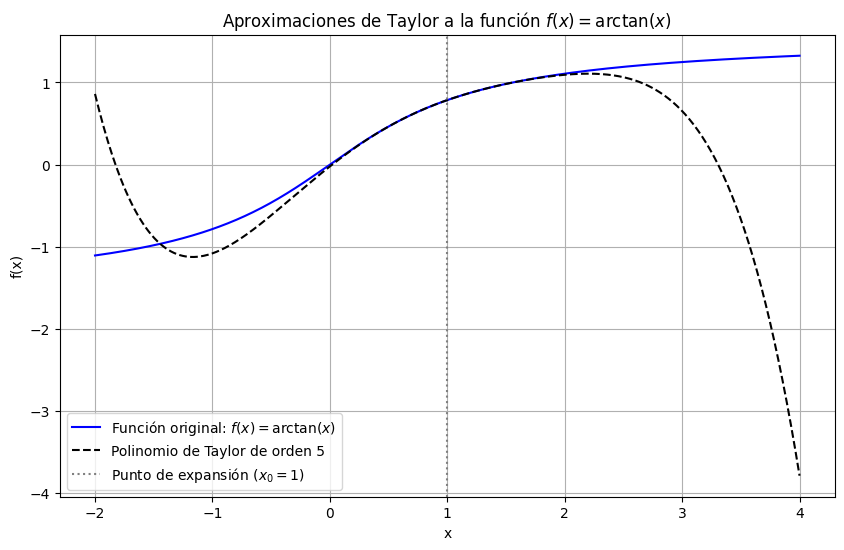

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir la variable simbólica x y la función original f(x) = atan(x)
x = sp.Symbol('x')
f = sp.atan(x)
x0 = 1  # Punto de expansión

# Calcular el polinomio de Taylor de orden 5
n = 5
taylor_series = sp.series(f, x, x0, n+1).removeO()

# Convertir la serie de Taylor y la función original a funciones lambda para evaluación numérica
taylor_func = sp.lambdify(x, taylor_series, 'numpy')
original_func = sp.lambdify(x, f, 'numpy')

# Crear valores de x para graficar en el intervalo [-2, 4]
x_vals = np.linspace(-2, 4, 500)
y_original = original_func(x_vals)
y_taylor = taylor_func(x_vals)

# Graficar la función original y la aproximación de Taylor
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_original, label="Función original: $f(x) = \\arctan(x)$", color="blue")
plt.plot(x_vals, y_taylor, label=f"Polinomio de Taylor de orden {n}", color="black", linestyle="--")
plt.axvline(x=x0, color="gray", linestyle=":", label=f"Punto de expansión ($x_0={x0}$)")
plt.title("Aproximaciones de Taylor a la función $f(x) = \\arctan(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()


### POLINOMIO DE LAGRANGE. - 

#### 1ra. FUNCION. -

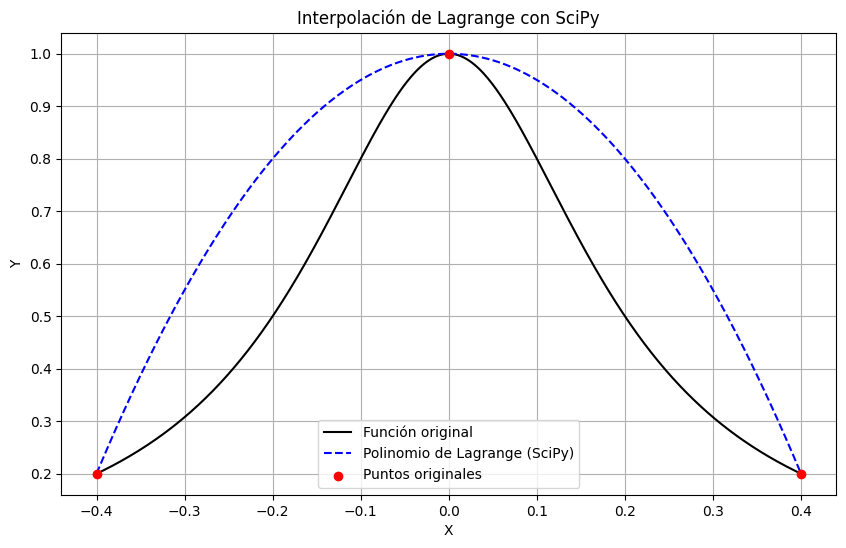

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Definir la función original
def original_function(x):
    return 1 / (25 * x**2 + 1)

# Puntos originales
original_points_x = [0, -0.4, 0.4]
original_points_y = [1, 0.2, 0.2]

# Generar valores de x para graficar
x_vals = np.linspace(-0.4, 0.4, 500)
y_original = original_function(x_vals)

# Utilizar el polinomio de Lagrange de SciPy
polynomial = lagrange(original_points_x, original_points_y)
y_lagrange = polynomial(x_vals)

# Graficar la función original, el polinomio de Lagrange y los puntos originales
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_original, label="Función original", color="black")
plt.plot(x_vals, y_lagrange, label="Polinomio de Lagrange (SciPy)", color="blue", linestyle="--")
plt.scatter(original_points_x, original_points_y, color="red", label="Puntos originales", zorder=5)
plt.title("Interpolación de Lagrange con SciPy")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()


#### 2da. FUNCION. -

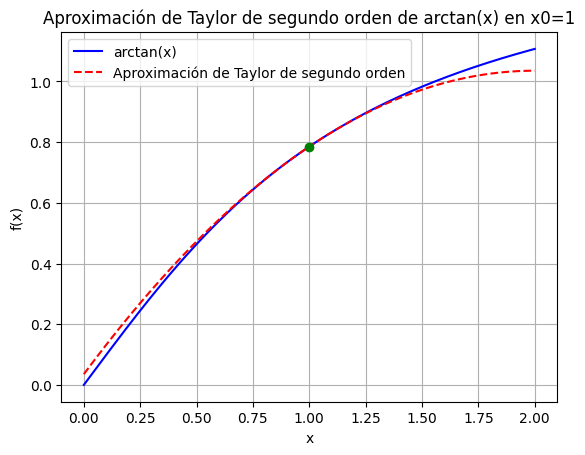

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir la variable simbólica y la función original
x = sp.Symbol('x')
f = sp.atan(x)

# Punto de expansión y calcular la expansión de Taylor de segundo orden en x0=1
x0 = 1
taylor_expansion = sp.series(f, x, x0, 3).removeO()  # Orden 3 porque incluye el término cuadrático

# Convertir la serie de Taylor a función numérica
taylor_func = sp.lambdify(x, taylor_expansion, 'numpy')
original_func = sp.lambdify(x, f, 'numpy')

# Generar valores de x para graficar
x_vals = np.linspace(0, 2, 400)
y_original = original_func(x_vals)
y_taylor = taylor_func(x_vals)

# Graficar la función original y la aproximación de Taylor
plt.plot(x_vals, y_original, label="arctan(x)", color="blue")
plt.plot(x_vals, y_taylor, label="Aproximación de Taylor de segundo orden", color="red", linestyle='--')
plt.scatter(x0, original_func(x0), color="green", zorder=5)  # Poner el punto en x0
plt.title("Aproximación de Taylor de segundo orden de arctan(x) en x0=1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
